In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [2]:
# Set the start and end date for fetching stock data
start_date = "2016-01-01"
end_date = datetime.datetime.today().strftime('2025-02-18')

# Get historical data from the stock from January 1, 2016 to end_date
spdr = yf.Ticker("SPY")
spdr_data = spdr.history(start=start_date, end=end_date)

In [3]:
display(spdr_data)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2016-01-04 00:00:00-05:00,171.918440,172.381480,170.289199,172.372910,222353500,0.0,0.0,0.0
2016-01-05 00:00:00-05:00,172.698738,173.127484,171.541132,172.664444,110845800,0.0,0.0,0.0
2016-01-06 00:00:00-05:00,170.074769,171.549654,169.440234,170.486374,152112600,0.0,0.0,0.0
2016-01-07 00:00:00-05:00,167.493782,169.303090,166.001743,166.396194,213436100,0.0,0.0,0.0
2016-01-08 00:00:00-05:00,167.373702,167.939649,164.278158,164.569702,209817200,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,604.030029,605.500000,602.739990,604.849976,26048700,0.0,0.0,0.0
2025-02-11 00:00:00-05:00,602.549988,605.859985,602.429993,605.309998,30056700,0.0,0.0,0.0
2025-02-12 00:00:00-05:00,599.200012,604.549988,598.510010,603.359985,45076100,0.0,0.0,0.0


<h2/> Data Preprocessing

In [4]:
spdr_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2294 entries, 2016-01-04 00:00:00-05:00 to 2025-02-14 00:00:00-05:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2294 non-null   float64
 1   High           2294 non-null   float64
 2   Low            2294 non-null   float64
 3   Close          2294 non-null   float64
 4   Volume         2294 non-null   int64  
 5   Dividends      2294 non-null   float64
 6   Stock Splits   2294 non-null   float64
 7   Capital Gains  2294 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 161.3 KB


In [5]:
spdr_data[spdr_data.isnull().any(axis=1)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,


In [6]:
spdr_data.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64

<h2/> EDA and Visualization

<h4/> Descriptive Statistics

In [7]:
print("Descriptive Statistics:")
display(spdr_data.describe())

Descriptive Statistics:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2294.000000,2294.0,2294.0
mean,332.932766,334.736005,330.970677,332.990352,8.291910e+07,0.022444,0.0,0.0
std,115.219204,115.751838,114.607647,115.230636,4.166765e+07,0.180200,0.0,0.0
min,156.354974,157.864167,155.223077,156.800873,2.027000e+07,0.000000,0.0,0.0
25%,239.420017,240.511192,237.590986,239.013287,5.707362e+07,0.000000,0.0,0.0
50%,308.041759,309.742952,306.706829,307.980911,7.363175e+07,0.000000,0.0,0.0
75%,416.336104,419.367477,413.748086,416.980576,9.601798e+07,0.000000,0.0,0.0
max,609.940002,610.989990,609.070007,609.750000,3.922207e+08,1.966000,0.0,0.0


In [8]:
sns.set_style("darkgrid")       # Dark background with grid for contrast
sns.set_context("notebook")     # Optimized for Jupyter readability
sns.set_palette("husl")         # Vibrant, distinct colors
plt.rcParams['figure.figsize'] = (14, 6)  # Default figure size

<h4/> Time Series Plot

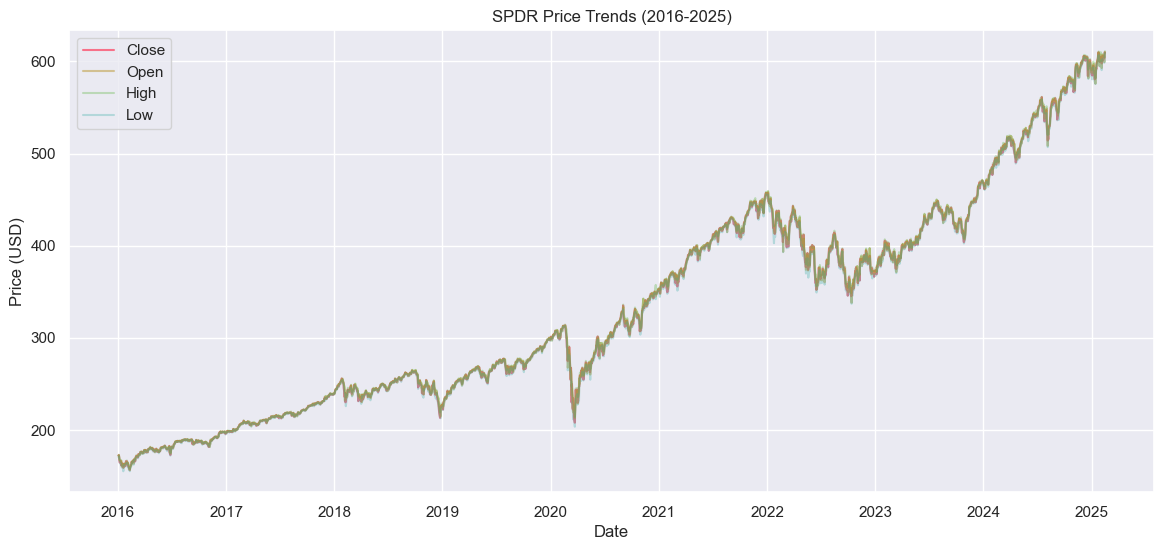

In [12]:
sns.lineplot(data=spdr_data, x=spdr_data.index, y='Close', label='Close')
sns.lineplot(data=spdr_data, x=spdr_data.index, y='Open', label='Open', alpha=0.5)
sns.lineplot(data=spdr_data, x=spdr_data.index, y='High', label='High', alpha=0.3)
sns.lineplot(data=spdr_data, x=spdr_data.index, y='Low', label='Low', alpha=0.3)
plt.title('SPDR Price Trends (2016-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<h4/> Close Price (Last Year Zoom-in)

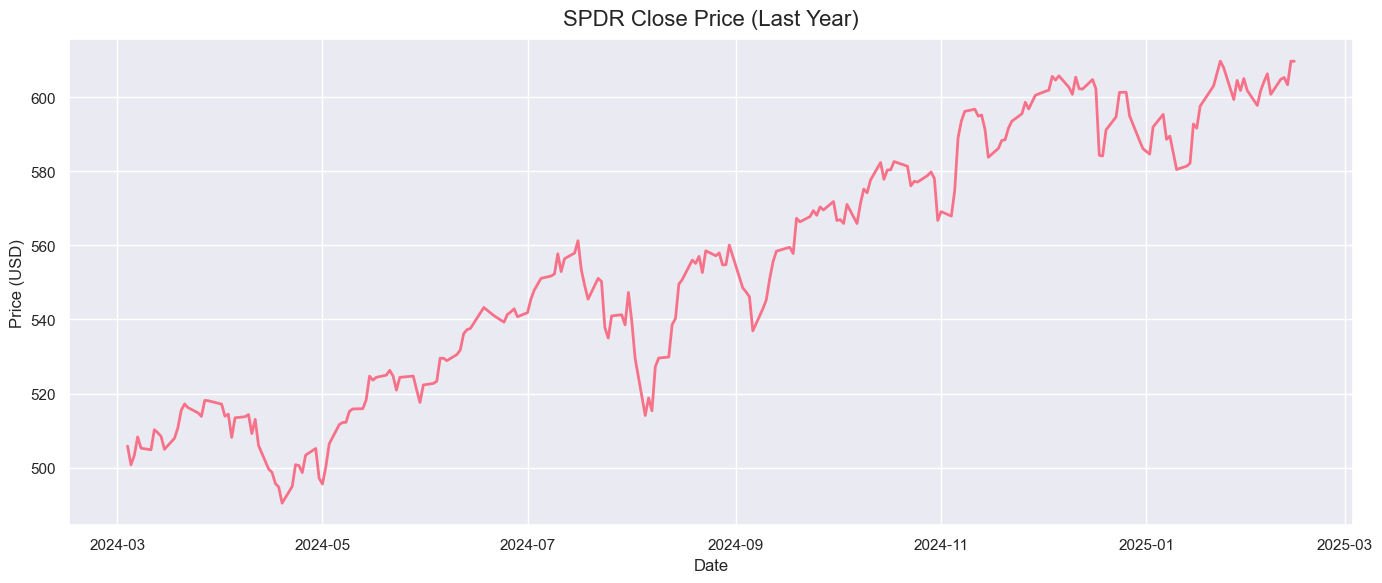

In [14]:
last_year = spdr_data[spdr_data.index >= '2024-03-04']

plt.figure()
sns.lineplot(data=last_year, x=last_year.index, y='Close', linewidth=2)
plt.title('SPDR Close Price (Last Year)', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Close Price Distribution

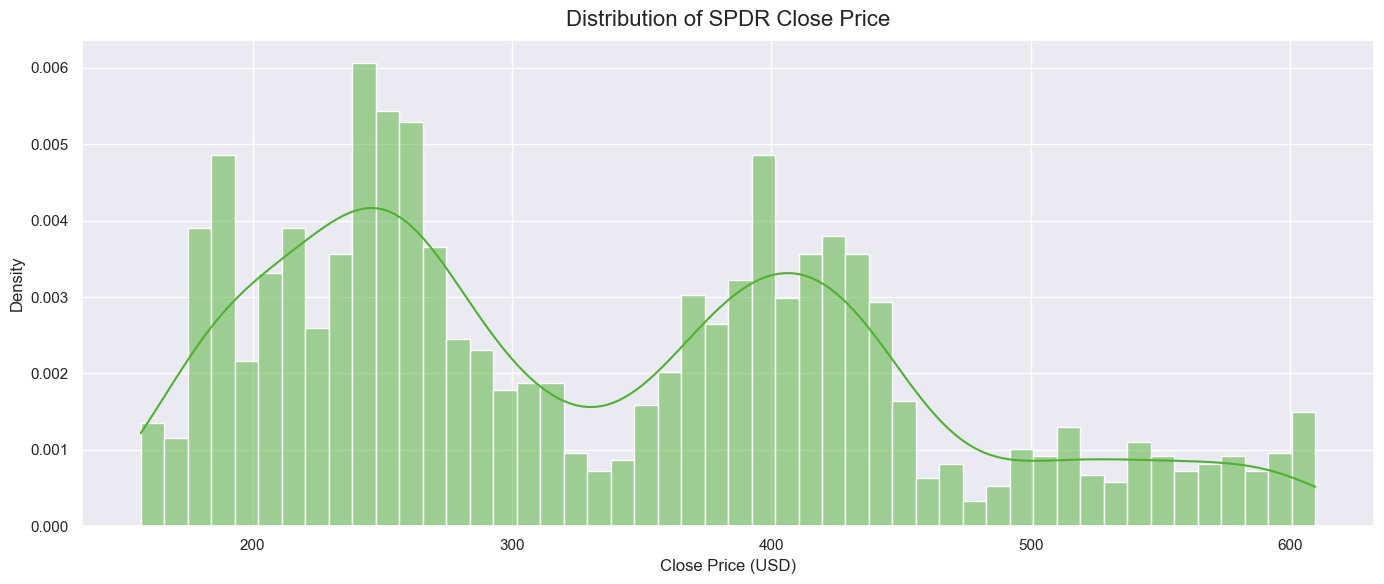

In [16]:
plt.figure()
sns.histplot(data=spdr_data, x='Close', bins=50, kde=True, color=sns.color_palette("husl")[2], stat='density')
plt.title('Distribution of SPDR Close Price', fontsize=16, pad=10)
plt.xlabel('Close Price (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> ADF Test for Stationarity

In [17]:
adf_result = adfuller(spdr_data['Close'].dropna())
print("ADF Test for Stationarity (Close):")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Stationary" if adf_result[1] < 0.05 else "Non-Stationary")

ADF Test for Stationarity (Close):
ADF Statistic: 0.5728153962014522
p-value: 0.9869260523706983
Non-Stationary


<h4/> Daily Returns Time Series Plot

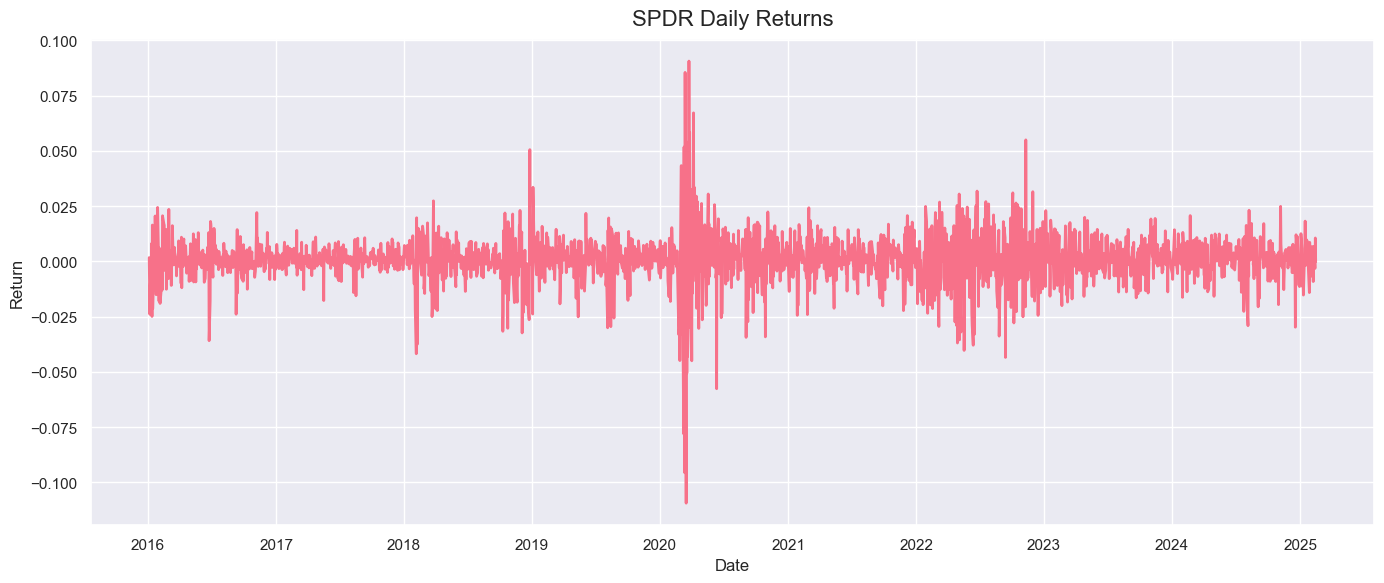

In [18]:
returns = spdr_data['Close'].pct_change().dropna()
returns_df = pd.DataFrame({'Returns': returns}, index=returns.index)
plt.figure()
sns.lineplot(data=returns_df, x=returns_df.index, y='Returns', linewidth=2)
plt.title('SPDR Daily Returns', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.tight_layout()
plt.show()

<h4/> Correlation Matrix

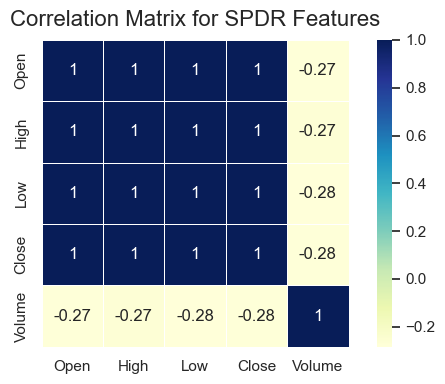

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(spdr_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='YlGnBu', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix for SPDR Features', fontsize=16, pad=10)
plt.tight_layout()
plt.show()

<h4/> Rolling Mean and Std Dev

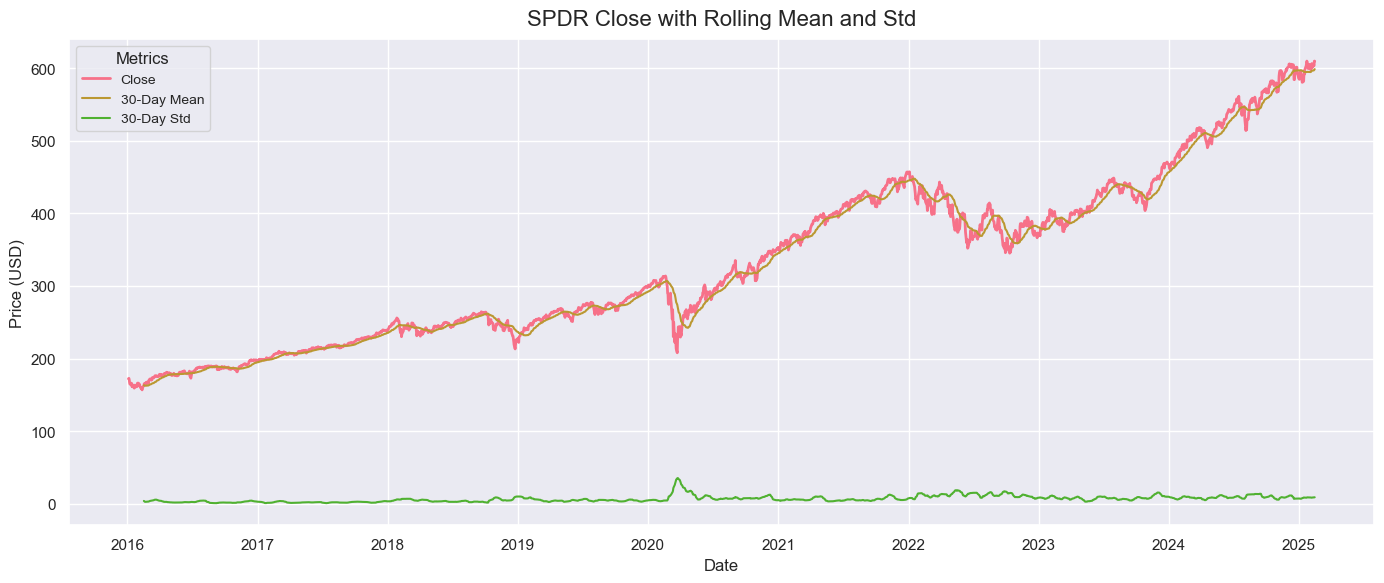

In [22]:
rolling_mean = spdr_data['Close'].rolling(window=30).mean()
rolling_std = spdr_data['Close'].rolling(window=30).std()
rolling_df = pd.DataFrame({'Close': spdr_data['Close'], '30-Day Mean': rolling_mean, '30-Day Std': rolling_std})
plt.figure()
sns.lineplot(data=rolling_df, x=rolling_df.index, y='Close', label='Close', linewidth=2)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Mean', label='30-Day Mean', linewidth=1.5)
sns.lineplot(data=rolling_df, x=rolling_df.index, y='30-Day Std', label='30-Day Std', linewidth=1.5)
plt.title('SPDR Close with Rolling Mean and Std', fontsize=16, pad=10)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Metrics', fontsize=10)
plt.tight_layout()
plt.show()